In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import methods 
import sys
sys.path.append("../")
from methods.dataframe_methods import clean_columns 

In [4]:
# Set column display options
pd.set_option("display.max_columns", None)

US crime rates 1960-2014

In [5]:
# Read the CSV file into a `pandas` DataFrame - US Crime Rates 1960-2014 Data Set
us_crime_1960_2014_file = "https://raw.githubusercontent.com/kkruel8100/Crime-Analysis/main/resources/US_Crime_Rates_1960_2014.csv"
us_crime_1960_2014_df = pd.read_csv(us_crime_1960_2014_file, low_memory=False)

# Create copy
us_crime_1960_2014_df_copy = us_crime_1960_2014_df.copy()

# Clean columns
cleaned_crime_1960_2014_copy = clean_columns(us_crime_1960_2014_df_copy)
cleaned_crime_1960_2014_copy.head()

# Rename columns
cleaned_crime_1960_2014_copy = cleaned_crime_1960_2014_copy.rename(columns={"violent": "total_violent", "property": "total_nonviolent"})

# Display df head and info
display(cleaned_crime_1960_2014_copy.head())
display(cleaned_crime_1960_2014_copy.info())

,year,population,total,total_violent,total_nonviolent,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                55 non-null     int64
 1   population          55 non-null     int64
 2   total               55 non-null     int64
 3   total_violent       55 non-null     int64
 4   total_nonviolent    55 non-null     int64
 5   murder              55 non-null     int64
 6   forcible_rape       55 non-null     int64
 7   robbery             55 non-null     int64
 8   aggravated_assault  55 non-null     int64
 9   burglary            55 non-null     int64
 10  larceny_theft       55 non-null     int64
 11  vehicle_theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


None

In [6]:
# Reset index to year
crime_rates_df = cleaned_crime_1960_2014_copy.set_index('year')
crime_rates_df.tail()

,population,total,total_violent,total_nonviolent,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
year,,,,,,,,,,,
2010,309330219,10363873,1251248,9112625,14772,85593,369089,781844,2168457,6204601,739565
2011,311587816,10258774,1206031,9052743,14661,84175,354772,752423,2185140,6151095,716508
2012,313873685,10219059,1217067,9001992,14866,85141,355051,762009,2109932,6168874,723186
2013,316497531,9850445,1199684,8650761,14319,82109,345095,726575,1931835,6018632,700294
2014,318857056,9475816,1197987,8277829,14249,84041,325802,741291,1729806,5858496,689527


In [7]:
# Convert values into millions
crime_rates_df = crime_rates_df / 1000000
crime_rates_df.head()

,population,total,total_violent,total_nonviolent,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
year,,,,,,,,,,,
1960,179.323175,3.3842,0.28846,3.0957,0.00911,0.01719,0.10784,0.15432,0.9121,1.8554,0.3282
1961,182.992000,3.4880,0.28939,3.1986,0.00874,0.01722,0.10667,0.15676,0.9496,1.9130,0.3360
1962,185.771000,3.7522,0.30151,3.4507,0.00853,0.01755,0.11086,0.16457,0.9943,2.0896,0.3668
1963,188.483000,4.1095,0.31697,3.7925,0.00864,0.01765,0.11647,0.17421,1.0864,2.2978,0.4083
1964,191.141000,4.5646,0.36422,4.2004,0.00936,0.02142,0.13039,0.20305,1.2132,2.5144,0.4728


In [8]:
# Remove population, violent, and property crime columns.
crime_rates = crime_rates_df.drop(columns=["population", "total_violent", "total_nonviolent"])
crime_rates.head()

,total,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
year,,,,,,,,
1960,3.3842,0.00911,0.01719,0.10784,0.15432,0.9121,1.8554,0.3282
1961,3.4880,0.00874,0.01722,0.10667,0.15676,0.9496,1.9130,0.3360
1962,3.7522,0.00853,0.01755,0.11086,0.16457,0.9943,2.0896,0.3668
1963,4.1095,0.00864,0.01765,0.11647,0.17421,1.0864,2.2978,0.4083
1964,4.5646,0.00936,0.02142,0.13039,0.20305,1.2132,2.5144,0.4728


In [9]:
# Plot all crimes
crime_rates_plot = crime_rates.hvplot.line(
    title = "US Crime Rates 1960-2014",
    xlabel = "Year",
    ylabel = "Number of Crimes (in Millions)",
    width = 1000,
    height = 500,
    grid = True
)

# Display plot
crime_rates_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [10]:
# Group crimes by non-violent 
nonviolent_crimes = crime_rates_df[["total_nonviolent", "burglary", "larceny_theft", "vehicle_theft"]]
nonviolent_crimes.head()

# Show nonviolent_crimes
nonviolent_crimes.head()

,total_nonviolent,burglary,larceny_theft,vehicle_theft
year,,,,
1960,3.0957,0.9121,1.8554,0.3282
1961,3.1986,0.9496,1.9130,0.3360
1962,3.4507,0.9943,2.0896,0.3668
1963,3.7925,1.0864,2.2978,0.4083
1964,4.2004,1.2132,2.5144,0.4728


In [11]:
# Plot non-violent crimes
nonviolent_crimes_plot = nonviolent_crimes.hvplot.line(
    title="Non-Violent Crimes 1960-2014",
    xlabel="Year",
    ylabel="Number of Crimes (in Millions)",
    width=1000,
    height=400,
    grid=True
)

# Display plot
nonviolent_crimes_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [12]:
# Slice the data to show only total non-violent crimes
total_nonviolent_crimes = crime_rates_df[["total_nonviolent"]]
total_nonviolent_crimes.head()

,total_nonviolent
year,
1960,3.0957
1961,3.1986
1962,3.4507
1963,3.7925
1964,4.2004


In [13]:
# Plot only total non-violent crimes
total_nonviolent_crimes_plot = total_nonviolent_crimes.hvplot.line(
    title="Total Non-Violent Crimes 1960-2014",
    x='year',
    xlabel="Year",
    ylabel="Number of Crime (in Millions)",
    width=1000,
    height=400,
    grid=True
)

# Display plot
total_nonviolent_crimes_plot

:Curve   [year]   (total_nonviolent)

In [14]:
# Group crimes by violent
violent_crimes = crime_rates_df[['total_violent', 'murder', 'forcible_rape', 'robbery', 'aggravated_assault',]]
violent_crimes.head()

,total_violent,murder,forcible_rape,robbery,aggravated_assault
year,,,,,
1960,0.28846,0.00911,0.01719,0.10784,0.15432
1961,0.28939,0.00874,0.01722,0.10667,0.15676
1962,0.30151,0.00853,0.01755,0.11086,0.16457
1963,0.31697,0.00864,0.01765,0.11647,0.17421
1964,0.36422,0.00936,0.02142,0.13039,0.20305


In [15]:
# Create visual for violent crimes 
violent_crimes_plot = violent_crimes.hvplot( 
    title="Violent Crimes 1960-2014",
    x='year',
    xlabel="Year",
    ylabel="Number of Crimes (in Millions)",
    width=1000,
    height=400,
    grid=True
)

# Display plot
violent_crimes_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [16]:
# Show only total violent crimes
total_violent_crimes = crime_rates_df[['total_violent']]
total_violent_crimes.head()

,total_violent
year,
1960,0.28846
1961,0.28939
1962,0.30151
1963,0.31697
1964,0.36422


In [17]:
# Create visual for total violent crimes
total_violent_crimes = total_violent_crimes.hvplot.line(
    title="Total Violent Crimes 1960-2014",
    x ='year',
    xlabel="Year",
    ylabel="Number of Crimes (in Millions)",
    width=1000,
    height=400,
    grid=True
)

#Display plot
total_violent_crimes

:Curve   [year]   (total_violent)

In [18]:
# Plot total non-violent and violent crimes
total_crimes = crime_rates_df[["total_violent", "total_nonviolent"]]
total_crimes.head()

,total_violent,total_nonviolent
year,,
1960,0.28846,3.0957
1961,0.28939,3.1986
1962,0.30151,3.4507
1963,0.31697,3.7925
1964,0.36422,4.2004


In [19]:
# Plot total crimes
total_crimes_plot = total_crimes.hvplot(
    title="Total Violent vs Non-Violent Crimes 1960-2014",
    x ='year',
    xlabel="Year",
    ylabel="Number of Crimes (in Millions)",
    width=1000,
    height=400,
    grid=True   
)

#Display plot
total_crimes_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

Using Prophet for forecasting total nonviolent crimes

In [20]:
# Create new dataframe from non violent crimes
total_nonviolent_trends = total_crimes["total_nonviolent"].to_frame()

# Display head and tail
display(total_nonviolent_trends.head())
display(total_nonviolent_trends.tail())

,total_nonviolent
year,
1960,3.0957
1961,3.1986
1962,3.4507
1963,3.7925
1964,4.2004


,total_nonviolent
year,
2010,9.112625
2011,9.052743
2012,9.001992
2013,8.650761
2014,8.277829


In [21]:
# Reset the index
total_nonviolent_trends.reset_index(inplace=True)

# Label the columns for Prophet
total_nonviolent_trends.columns = ["ds", "y"]

# Display dtype
total_nonviolent_trends.dtypes

ds      int64
y     float64
dtype: object

In [22]:
# Tranlate year object to date time using last day of year for year data
total_nonviolent_trends["ds"] = pd.to_datetime(total_nonviolent_trends["ds"], format="%Y")

# Display dtype
total_nonviolent_trends.dtypes

# Display head and tail
display(total_nonviolent_trends.head())
display(total_nonviolent_trends.tail())

,ds,y
0,1960-01-01,3.0957
1,1961-01-01,3.1986
2,1962-01-01,3.4507
3,1963-01-01,3.7925
4,1964-01-01,4.2004


,ds,y
50,2010-01-01,9.112625
51,2011-01-01,9.052743
52,2012-01-01,9.001992
53,2013-01-01,8.650761
54,2014-01-01,8.277829


In [23]:
# Adjust date to last day of year
total_nonviolent_trends["ds"] = total_nonviolent_trends["ds"].apply(lambda x: x.replace(month=12, day=31))

# Display head and tail
display(total_nonviolent_trends.head())
display(total_nonviolent_trends.tail())

,ds,y
0,1960-12-31,3.0957
1,1961-12-31,3.1986
2,1962-12-31,3.4507
3,1963-12-31,3.7925
4,1964-12-31,4.2004


,ds,y
50,2010-12-31,9.112625
51,2011-12-31,9.052743
52,2012-12-31,9.001992
53,2013-12-31,8.650761
54,2014-12-31,8.277829


In [24]:
# Call the Prophet function, store as an object
total_nonviolent_m = Prophet()
total_nonviolent_m

In [25]:
# Fit the time-series model.
total_nonviolent_m.fit(total_nonviolent_trends)

17:12:09 - cmdstanpy - INFO - Chain [1] start processing


17:12:10 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_total_nonviolent_trends = total_nonviolent_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows of the future_inflation_trends DataFrame
future_total_nonviolent_trends.tail()

,ds
70,2030-12-31
71,2031-12-31
72,2032-12-31
73,2033-12-31
74,2034-12-31


In [27]:
# Make the predictions for the trend data using the future_total_nonviolent_trends DataFrame
forecast_total_nonviolent_trends = total_nonviolent_m.predict(future_total_nonviolent_trends)

# Display the head and tail of forecast_total_nonviolent_trends DataFrame
display(forecast_total_nonviolent_trends.head())
display(forecast_total_nonviolent_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-12-31,2.604326,2.221942,3.284031,2.604326,2.604326,0.144244,0.144244,0.144244,0.144244,0.144244,0.144244,0.0,0.0,0.0,2.748570
1,1961-12-31,3.039222,2.620401,3.678049,3.039222,3.039222,0.088196,0.088196,0.088196,0.088196,0.088196,0.088196,0.0,0.0,0.0,3.127418
2,1962-12-31,3.474119,3.009993,4.061278,3.474119,3.474119,0.084626,0.084626,0.084626,0.084626,0.084626,0.084626,0.0,0.0,0.0,3.558744
3,1963-12-31,3.909015,3.516274,4.588226,3.909015,3.909015,0.133530,0.133530,0.133530,0.133530,0.133530,0.133530,0.0,0.0,0.0,4.042545
4,1964-12-31,4.345103,3.933321,5.005154,4.345103,4.345103,0.144244,0.144244,0.144244,0.144244,0.144244,0.144244,0.0,0.0,0.0,4.489347


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,2030-12-31,5.775127,4.645894,7.073766,4.745479,6.790493,0.084626,0.084626,0.084626,0.084626,0.084626,0.084626,0.0,0.0,0.0,5.859752
71,2031-12-31,5.608066,4.455257,7.074395,4.490031,6.727462,0.133530,0.133530,0.133530,0.133530,0.133530,0.133530,0.0,0.0,0.0,5.741596
72,2032-12-31,5.440548,4.189486,7.049792,4.230273,6.662369,0.144244,0.144244,0.144244,0.144244,0.144244,0.144244,0.0,0.0,0.0,5.584792
73,2033-12-31,5.273487,3.905637,6.886495,3.940017,6.604568,0.088196,0.088196,0.088196,0.088196,0.088196,0.088196,0.0,0.0,0.0,5.361683
74,2034-12-31,5.106427,3.606432,6.732515,3.678852,6.575636,0.084626,0.084626,0.084626,0.084626,0.084626,0.084626,0.0,0.0,0.0,5.191053


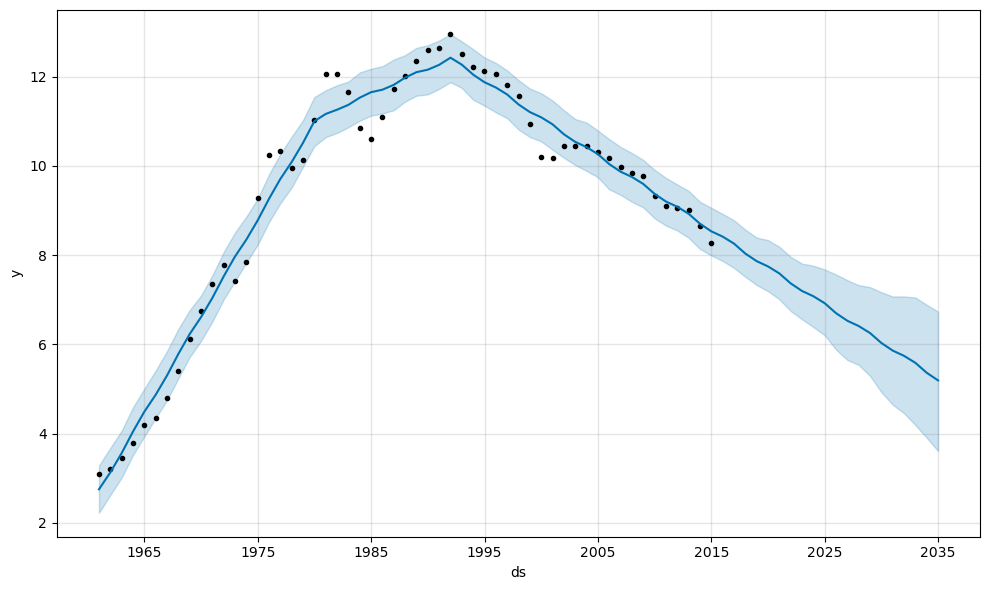

In [28]:
# Plot the Prophet predictions for the total nonviolent trends data

# Added ; to prevent 2 plots from displaying

total_nonviolent_m_plot = total_nonviolent_m.plot(forecast_total_nonviolent_trends);

In [29]:
# Save the plot as PNG
total_nonviolent_m_plot.savefig('../assets/total_nonviolent_m_plot.png')

In [30]:
# Show nonviolent trends
total_nonviolent_trends

,ds,y
0,1960-12-31,3.095700
1,1961-12-31,3.198600
2,1962-12-31,3.450700
3,1963-12-31,3.792500
4,1964-12-31,4.200400
5,1965-12-31,4.352000
6,1966-12-31,4.793300
7,1967-12-31,5.403500
8,1968-12-31,6.125200
9,1969-12-31,6.749000


In [31]:
# Create trends for last 30 years
total_nonviolent_trends_30 = total_nonviolent_trends.iloc[24:,:]

# Display trends
total_nonviolent_trends_30

,ds,y
24,1984-12-31,10.608500
25,1985-12-31,11.102600
26,1986-12-31,11.722700
27,1987-12-31,12.024700
28,1988-12-31,12.356900
29,1989-12-31,12.605400
30,1990-12-31,12.655500
31,1991-12-31,12.961100
32,1992-12-31,12.505900
33,1993-12-31,12.218800


In [32]:
# Call the Prophet function, store as an object
total_nonviolent_trends_30_m = Prophet()
total_nonviolent_trends_30_m

In [33]:
# Fit the time-series model.
total_nonviolent_trends_30_m.fit(total_nonviolent_trends_30)

17:12:10 - cmdstanpy - INFO - Chain [1] start processing
17:12:10 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_total_nonviolent_trends_30 = total_nonviolent_trends_30_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows of the future_inflation_trends DataFrame
future_total_nonviolent_trends_30.tail()

,ds
46,2030-12-31
47,2031-12-31
48,2032-12-31
49,2033-12-31
50,2034-12-31


In [35]:
# Make the predictions for the trend data using the future_inflation_trends DataFrame
forecast_total_nonviolent_trends_30 = total_nonviolent_trends_30_m.predict(future_total_nonviolent_trends_30)

# Display the head and tail of forecast_inflation_trends DataFrame
display(forecast_total_nonviolent_trends_30.head())
display(forecast_total_nonviolent_trends_30.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1984-12-31,0.855366,10.971062,11.800592,0.855366,0.855366,10.512791,10.512791,10.512791,10.512791,10.512791,10.512791,0.0,0.0,0.0,11.368158
1,1985-12-31,1.010746,11.135698,11.984450,1.010746,1.010746,10.529480,10.529480,10.529480,10.529480,10.529480,10.529480,0.0,0.0,0.0,11.540226
2,1986-12-31,1.166125,11.287569,12.179577,1.166125,1.166125,10.550725,10.550725,10.550725,10.550725,10.550725,10.550725,0.0,0.0,0.0,11.716851
3,1987-12-31,1.321505,11.493467,12.303681,1.321505,1.321505,10.576514,10.576514,10.576514,10.576514,10.576514,10.576514,0.0,0.0,0.0,11.898019
4,1988-12-31,1.477307,11.537198,12.393475,1.477307,1.477307,10.512791,10.512791,10.512791,10.512791,10.512791,10.512791,0.0,0.0,0.0,11.990098


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
46,2030-12-31,-4.858189,4.779499,6.663023,-5.703245,-3.970212,10.550725,10.550725,10.550725,10.550725,10.550725,10.550725,0.0,0.0,0.0,5.692536
47,2031-12-31,-5.032427,4.517244,6.675432,-5.970798,-4.052550,10.576514,10.576514,10.576514,10.576514,10.576514,10.576514,0.0,0.0,0.0,5.544087
48,2032-12-31,-5.207142,4.190400,6.461102,-6.250877,-4.133029,10.512791,10.512791,10.512791,10.512791,10.512791,10.512791,0.0,0.0,0.0,5.305649
49,2033-12-31,-5.381380,4.030458,6.378376,-6.496698,-4.226100,10.529480,10.529480,10.529480,10.529480,10.529480,10.529480,0.0,0.0,0.0,5.148100
50,2034-12-31,-5.555618,3.755031,6.342179,-6.760511,-4.305570,10.550725,10.550725,10.550725,10.550725,10.550725,10.550725,0.0,0.0,0.0,4.995108


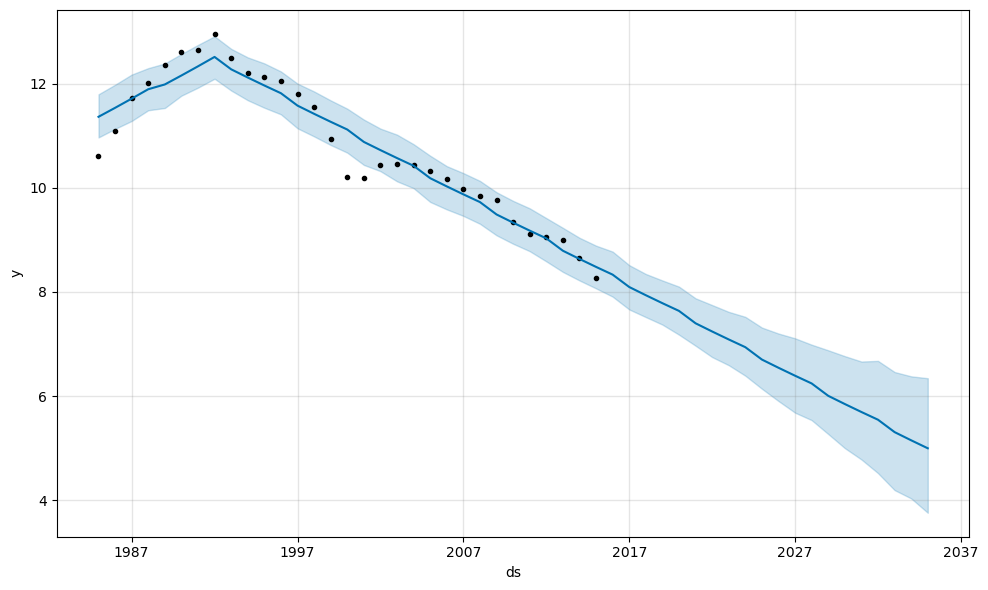

In [36]:
# Plot the Prophet predictions for the inflation trends data

# Added ; to prevent 2 plots from displaying

total_nonviolent_30_m_plot = total_nonviolent_trends_30_m.plot(forecast_total_nonviolent_trends_30);

In [37]:
# Save the plot as PNG
total_nonviolent_30_m_plot.savefig('../assets/total_nonviolent_30_m_plot.png')

Using Prophet for forecasting total violent crimes

In [38]:
# Create new dataframe from violent crimes
total_violent_trends = total_crimes["total_violent"].to_frame()

# Display head and tail
display(total_violent_trends.head())
display(total_violent_trends.tail())

,total_violent
year,
1960,0.28846
1961,0.28939
1962,0.30151
1963,0.31697
1964,0.36422


,total_violent
year,
2010,1.251248
2011,1.206031
2012,1.217067
2013,1.199684
2014,1.197987


In [39]:
# Reset the index
total_violent_trends.reset_index(inplace=True)

# Label the columns for Prophet
total_violent_trends.columns = ["ds", "y"]

# Display dtype
total_violent_trends.dtypes

ds      int64
y     float64
dtype: object

In [40]:
# Tranlate year object to date time using last day of year for year data
total_violent_trends["ds"] = pd.to_datetime(total_violent_trends["ds"], format="%Y")

# Display dtype
total_violent_trends.dtypes

# Display head and tail
display(total_violent_trends.head())
display(total_violent_trends.tail())

,ds,y
0,1960-01-01,0.28846
1,1961-01-01,0.28939
2,1962-01-01,0.30151
3,1963-01-01,0.31697
4,1964-01-01,0.36422


,ds,y
50,2010-01-01,1.251248
51,2011-01-01,1.206031
52,2012-01-01,1.217067
53,2013-01-01,1.199684
54,2014-01-01,1.197987


In [41]:
# Adjust date to last day of year
total_violent_trends["ds"] = total_violent_trends["ds"].apply(lambda x: x.replace(month=12, day=31))

# Display head and tail
display(total_violent_trends.head())
display(total_violent_trends.tail())

,ds,y
0,1960-12-31,0.28846
1,1961-12-31,0.28939
2,1962-12-31,0.30151
3,1963-12-31,0.31697
4,1964-12-31,0.36422


,ds,y
50,2010-12-31,1.251248
51,2011-12-31,1.206031
52,2012-12-31,1.217067
53,2013-12-31,1.199684
54,2014-12-31,1.197987


In [42]:
# Call the Prophet function, store as an object
total_violent_m = Prophet()
total_violent_m

In [43]:
# Fit the time-series model.
total_violent_m.fit(total_violent_trends)

17:12:10 - cmdstanpy - INFO - Chain [1] start processing
17:12:11 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_total_violent_trends = total_violent_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows 
future_total_violent_trends.tail()

,ds
70,2030-12-31
71,2031-12-31
72,2032-12-31
73,2033-12-31
74,2034-12-31


In [45]:
# Make the predictions for the trend data 
forecast_total_violent_trends = total_violent_m.predict(future_total_violent_trends)

# Display the head and tail 
display(forecast_total_violent_trends.head())
display(forecast_total_violent_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-12-31,0.149017,0.203853,1.027764,0.149017,0.149017,0.473032,0.473032,0.473032,0.473032,0.473032,0.473032,0.0,0.0,0.0,0.622049
1,1961-12-31,0.169615,0.256148,1.069662,0.169615,0.169615,0.479303,0.479303,0.479303,0.479303,0.479303,0.479303,0.0,0.0,0.0,0.648918
2,1962-12-31,0.190213,0.277492,1.079862,0.190213,0.190213,0.487994,0.487994,0.487994,0.487994,0.487994,0.487994,0.0,0.0,0.0,0.678208
3,1963-12-31,0.210812,0.297148,1.101930,0.210812,0.210812,0.499095,0.499095,0.499095,0.499095,0.499095,0.499095,0.0,0.0,0.0,0.709907
4,1964-12-31,0.231466,0.310951,1.112289,0.231466,0.231466,0.473032,0.473032,0.473032,0.473032,0.473032,0.473032,0.0,0.0,0.0,0.704498


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,2030-12-31,1.583470,1.656093,2.460876,1.583122,1.583859,0.487994,0.487994,0.487994,0.487994,0.487994,0.487994,0.0,0.0,0.0,2.071465
71,2031-12-31,1.603863,1.723303,2.514710,1.603475,1.604286,0.499095,0.499095,0.499095,0.499095,0.499095,0.499095,0.0,0.0,0.0,2.102959
72,2032-12-31,1.624313,1.679096,2.487282,1.623895,1.624770,0.473032,0.473032,0.473032,0.473032,0.473032,0.473032,0.0,0.0,0.0,2.097345
73,2033-12-31,1.644706,1.722780,2.534536,1.644243,1.645200,0.479303,0.479303,0.479303,0.479303,0.479303,0.479303,0.0,0.0,0.0,2.124009
74,2034-12-31,1.665099,1.752986,2.566141,1.664600,1.665635,0.487994,0.487994,0.487994,0.487994,0.487994,0.487994,0.0,0.0,0.0,2.153094


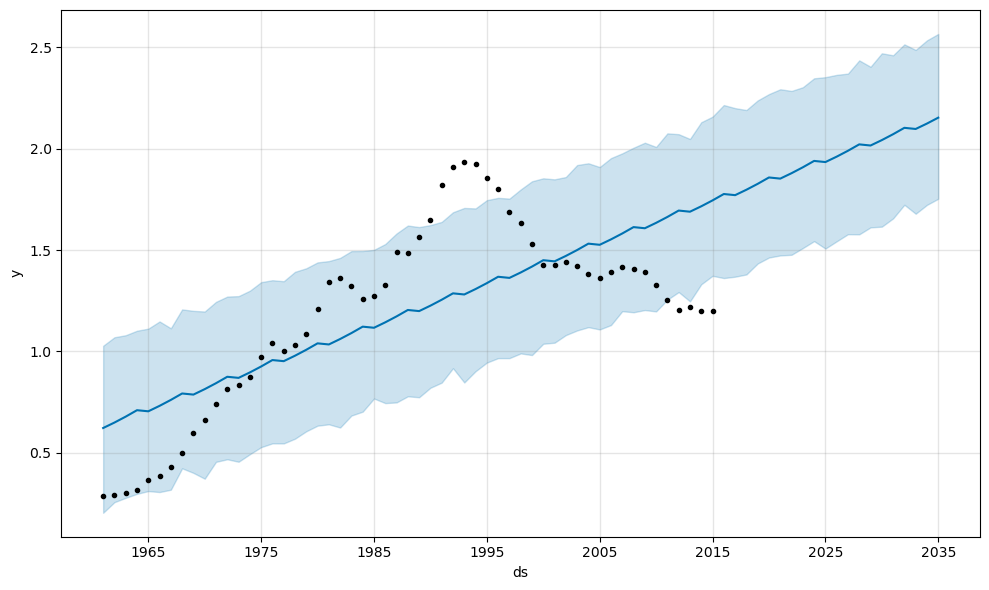

In [46]:
# Plot the Prophet predictions

# Added ; to prevent 2 plots from displaying

total_violent_m_plot = total_violent_m.plot(forecast_total_violent_trends);

In [47]:
# Save the plot as PNG
total_violent_m_plot.savefig('../assets/total_violent_m_plot.png')

In [48]:
# Show violent trends
total_violent_trends

,ds,y
0,1960-12-31,0.288460
1,1961-12-31,0.289390
2,1962-12-31,0.301510
3,1963-12-31,0.316970
4,1964-12-31,0.364220
5,1965-12-31,0.387390
6,1966-12-31,0.430180
7,1967-12-31,0.499930
8,1968-12-31,0.595010
9,1969-12-31,0.661870


In [49]:
# Create trends for last 30 years
total_violent_trends_30 = total_violent_trends.iloc[24:,:]

# Display trends
total_violent_trends_30

,ds,y
24,1984-12-31,1.273280
25,1985-12-31,1.328800
26,1986-12-31,1.489169
27,1987-12-31,1.483999
28,1988-12-31,1.566220
29,1989-12-31,1.646040
30,1990-12-31,1.820130
31,1991-12-31,1.911770
32,1992-12-31,1.932270
33,1993-12-31,1.926020


In [50]:
# Call the Prophet function, store as an object
total_violent_trends_30_m = Prophet()
total_violent_trends_30_m

In [51]:
# Fit the time-series model.
total_violent_trends_30_m.fit(total_violent_trends_30)

17:12:11 - cmdstanpy - INFO - Chain [1] start processing
17:12:11 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_total_violent_trends_30 = total_violent_trends_30_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows of the future_inflation_trends DataFrame
future_total_violent_trends_30.tail()

,ds
46,2030-12-31
47,2031-12-31
48,2032-12-31
49,2033-12-31
50,2034-12-31


In [53]:
# Make the predictions for the trend data using the future_inflation_trends DataFrame
forecast_total_violent_trends_30 = total_violent_trends_30_m.predict(future_total_violent_trends_30)

# Display the head and tail of forecast_inflation_trends DataFrame
display(forecast_total_violent_trends_30.head())
display(forecast_total_violent_trends_30.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1984-12-31,-0.035985,1.472698,1.901739,-0.035985,-0.035985,1.727151,1.727151,1.727151,1.727151,1.727151,1.727151,0.0,0.0,0.0,1.691166
1,1985-12-31,-0.050828,1.473665,1.942642,-0.050828,-0.050828,1.747825,1.747825,1.747825,1.747825,1.747825,1.747825,0.0,0.0,0.0,1.696997
2,1986-12-31,-0.065672,1.473445,1.939511,-0.065672,-0.065672,1.765648,1.765648,1.765648,1.765648,1.765648,1.765648,0.0,0.0,0.0,1.699976
3,1987-12-31,-0.080515,1.465780,1.925066,-0.080515,-0.080515,1.780596,1.780596,1.780596,1.780596,1.780596,1.780596,0.0,0.0,0.0,1.700081
4,1988-12-31,-0.095400,1.378938,1.853765,-0.095400,-0.095400,1.727151,1.727151,1.727151,1.727151,1.727151,1.727151,0.0,0.0,0.0,1.631751


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
46,2030-12-31,-0.721385,0.809995,1.259719,-0.721527,-0.721232,1.765648,1.765648,1.765648,1.765648,1.765648,1.765648,0.0,0.0,0.0,1.044262
47,2031-12-31,-0.736288,0.808087,1.271222,-0.736442,-0.736121,1.780596,1.780596,1.780596,1.780596,1.780596,1.780596,0.0,0.0,0.0,1.044309
48,2032-12-31,-0.751231,0.749453,1.225601,-0.751399,-0.751047,1.727151,1.727151,1.727151,1.727151,1.727151,1.727151,0.0,0.0,0.0,0.975920
49,2033-12-31,-0.766133,0.754962,1.202847,-0.766317,-0.765932,1.747825,1.747825,1.747825,1.747825,1.747825,1.747825,0.0,0.0,0.0,0.981692
50,2034-12-31,-0.781036,0.768417,1.208662,-0.781234,-0.780821,1.765648,1.765648,1.765648,1.765648,1.765648,1.765648,0.0,0.0,0.0,0.984612


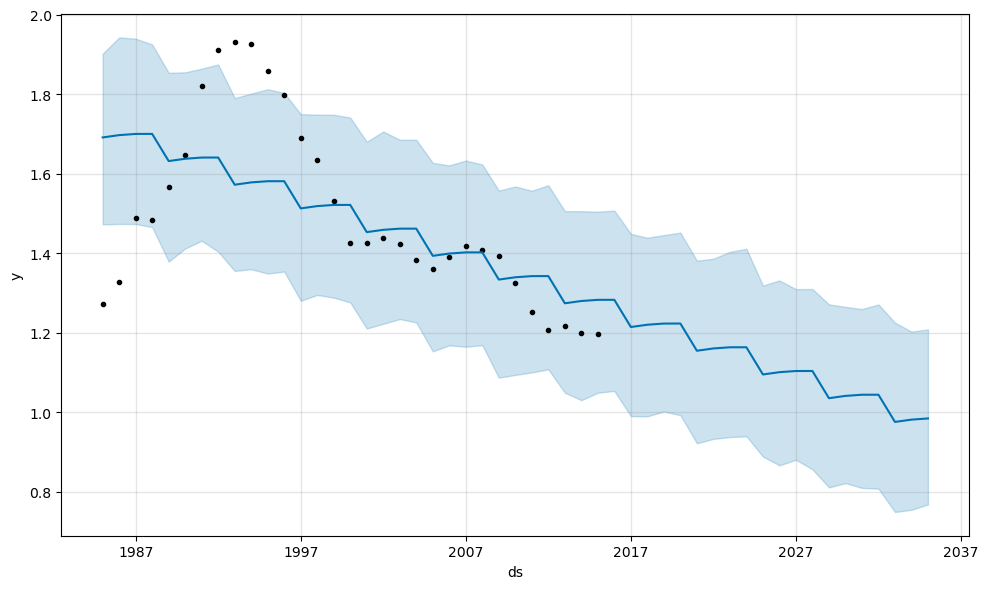

In [54]:
# Plot the Prophet predictions for the inflation trends data

# Added ; to prevent 2 plots from displaying

total_violent_30_m_plot = total_violent_trends_30_m.plot(forecast_total_violent_trends_30);

In [55]:
# Save the plot as PNG
total_violent_30_m_plot.savefig('../assets/total_violent_30_m_plot.png')

Simple Model

In [56]:
total_violent_trends

,ds,y
0,1960-12-31,0.288460
1,1961-12-31,0.289390
2,1962-12-31,0.301510
3,1963-12-31,0.316970
4,1964-12-31,0.364220
5,1965-12-31,0.387390
6,1966-12-31,0.430180
7,1967-12-31,0.499930
8,1968-12-31,0.595010
9,1969-12-31,0.661870


In [57]:
simple_model_violent = total_violent_trends.copy()
simple_model_violent.rename(columns={"ds": "year", "y": "violent"}, inplace=True)
simple_model_violent.set_index("year", inplace=True)
simple_model_violent


,violent
year,
1960-12-31,0.288460
1961-12-31,0.289390
1962-12-31,0.301510
1963-12-31,0.316970
1964-12-31,0.364220
1965-12-31,0.387390
1966-12-31,0.430180
1967-12-31,0.499930
1968-12-31,0.595010


In [58]:
violent = simple_model_violent["violent"]
train = violent.iloc[:-5]
test = violent.iloc[-5:]   

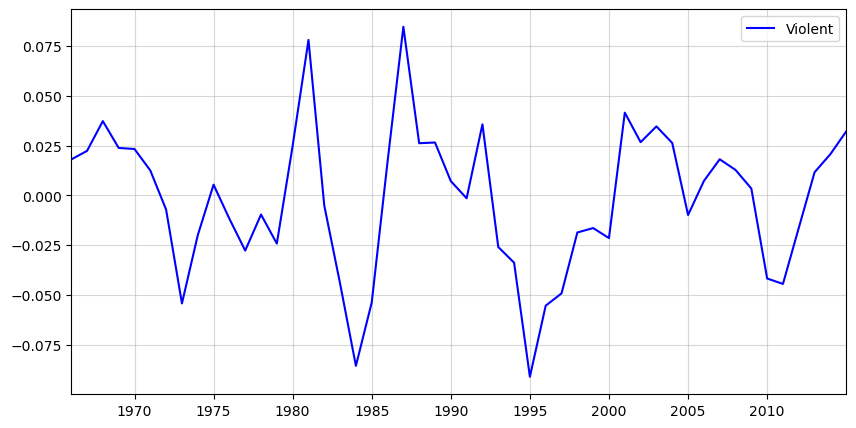

In [59]:
rooted = np.sqrt(violent)
diffed = rooted.diff(1)
diffed_s = diffed.diff(4).dropna()
plt.figure(figsize=(10,5))
plt.plot(diffed_s,color="blue",label="Violent")
plt.legend()
plt.margins(x=0)
plt.grid(alpha=0.5)

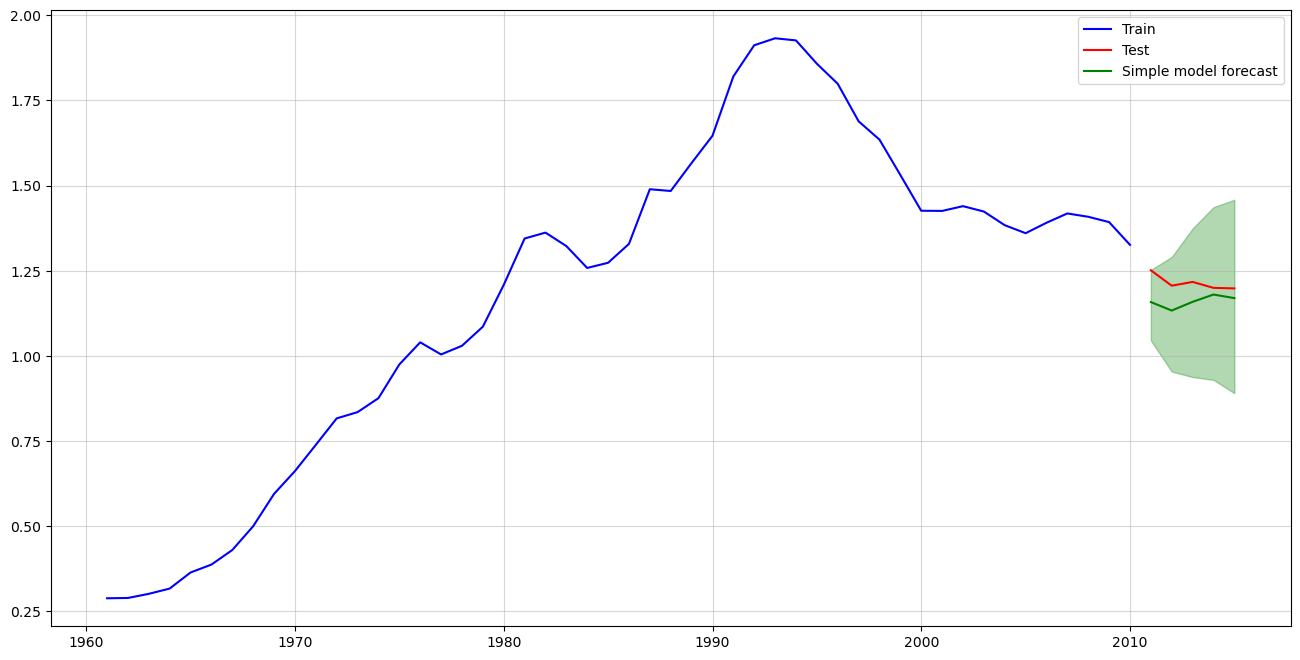

In [60]:
full_sample = []
np.random.seed(50)
for i in range(10000):
    draw = np.random.choice(diffed_s,len(test))
    result = list(diffed.iloc[-12:].values)
    for t in range(len(test)):
        result.append(result[t]+draw[t])
    full_sample.append(np.array(((rooted.iloc[-1])+np.cumsum(result[12:]))**2).reshape(-1,1))
reshaped = np.concatenate(full_sample,1)
result_mean = np.mean(reshaped,1)
lower = np.quantile(reshaped,0.05,1)
upper = np.quantile(reshaped,0.95,1)
plt.figure(figsize = (16,8))
plt.plot(train, label = "Train",color="blue")
plt.plot(test, label = "Test",color="red")
plt.grid(alpha = 0.5)
plt.plot(test.index, result_mean,label = "Simple model forecast",color="green")
plt.legend()
plt.fill_between(test.index,lower,upper,alpha=0.3,color="green");

# Save the figure as PNG
plt.savefig('../assets/simple_model_violent_plot.png')

# Show the plot
plt.show()
    

In [61]:
total_nonviolent_trends

,ds,y
0,1960-12-31,3.095700
1,1961-12-31,3.198600
2,1962-12-31,3.450700
3,1963-12-31,3.792500
4,1964-12-31,4.200400
5,1965-12-31,4.352000
6,1966-12-31,4.793300
7,1967-12-31,5.403500
8,1968-12-31,6.125200
9,1969-12-31,6.749000


In [62]:
simple_model_nonviolent = total_nonviolent_trends.copy()
simple_model_nonviolent.rename(columns={"ds": "year", "y": "nonviolent"}, inplace=True)
simple_model_nonviolent.set_index("year", inplace=True)
simple_model_nonviolent


,nonviolent
year,
1960-12-31,3.095700
1961-12-31,3.198600
1962-12-31,3.450700
1963-12-31,3.792500
1964-12-31,4.200400
1965-12-31,4.352000
1966-12-31,4.793300
1967-12-31,5.403500
1968-12-31,6.125200


In [63]:
nonviolent = simple_model_nonviolent["nonviolent"]
train = nonviolent.iloc[:-5]
test = nonviolent.iloc[-5:]  

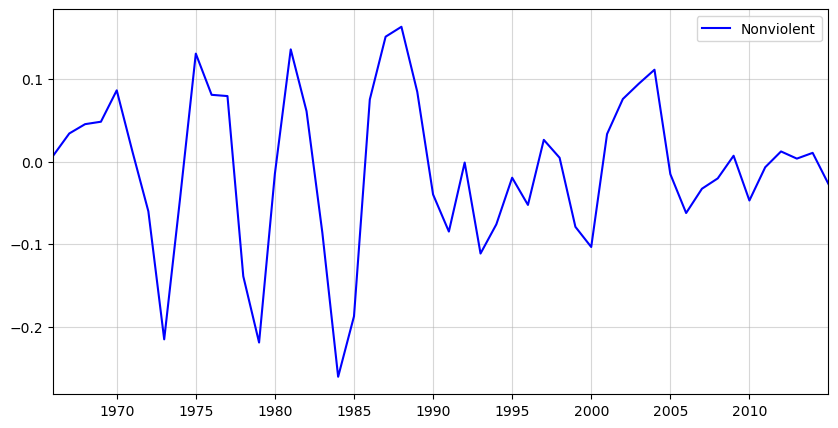

In [64]:
rooted = np.sqrt(nonviolent)
diffed = rooted.diff(1)
diffed_s = diffed.diff(4).dropna()
plt.figure(figsize=(10,5))
plt.plot(diffed_s,color="blue",label="Nonviolent")
plt.legend()
plt.margins(x=0)
plt.grid(alpha=0.5)

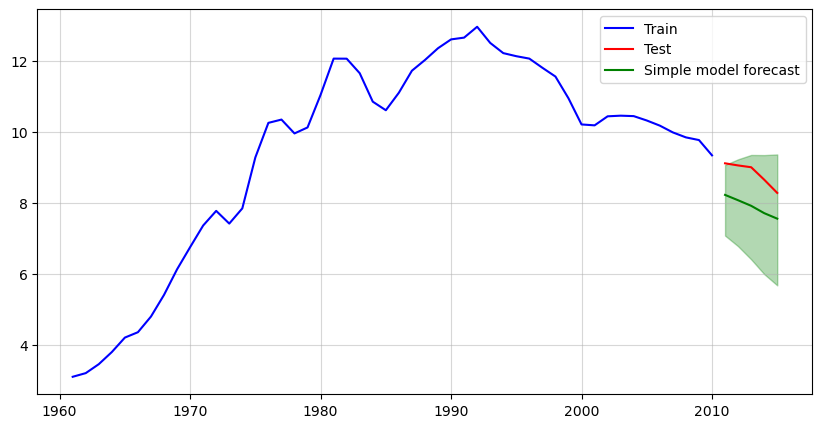

In [65]:
full_sample = []
np.random.seed(50)
for i in range(10000):
    draw = np.random.choice(diffed_s,len(test))
    result = list(diffed.iloc[-12:].values)
    for t in range(len(test)):
        result.append(result[t]+draw[t])
    full_sample.append(np.array(((rooted.iloc[-1])+np.cumsum(result[12:]))**2).reshape(-1,1))
reshaped = np.concatenate(full_sample,1)
result_mean = np.mean(reshaped,1)
lower = np.quantile(reshaped,0.05,1)
upper = np.quantile(reshaped,0.95,1)
plt.figure(figsize = (10,5))
plt.plot(train, label = "Train",color="blue")
plt.plot(test, label = "Test",color="red")
plt.grid(alpha = 0.5)
plt.plot(test.index, result_mean,label = "Simple model forecast",color="green")
plt.legend()
plt.fill_between(test.index,lower,upper,alpha=0.3,color="green");

# Save the figure as PNG
plt.savefig('../assets/simple_model_nonviolent_plot.png') 

# Show the plot
plt.show()